In [9]:
__nbid__ = '0024'
__author__ = 'Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, y el equipo de Data Lab <datalab@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['ls_dr10', 'sdss_dr17']
__keywords__ = ['extragalactic', 'galaxies', 'joint query', 'spectroscopic redshift', '3d plot']

# Estructura a Gran Escala con DESI Legacy Surveys y SDSS/BOSS 
por Stéphanie Juneau, David Herrera, y el Equipo de Astro Data Lab

#### (_Traducción de [LargeScaleStructureSdssLs.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/LargeScaleStructure/LargeScaleStructureSdssLs.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos Legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Consulta conjunta de catálogos LS y SDSS](#query)
* [Graficar resultados](#plots)
* [Ejercicio](#exercise)
* [Estructura a gran escala en 3D](3d_plot)

<a class="anchor" id="goals"></a>
# Objetivos
* Consulta conjunta entre catálogos fotométricos (LS) y espectroscópicos (SDSS)
* Graficar la posición en el cielo de objetos extragalácticos, codificada por color según el corrimiento al rojo
* Graficar posiciones de galaxias en 3D (espacio real) y explorar la estructura a gran escala de forma interactiva

# Resumen

En este notebook exploramos estructuras a gran escala de galaxias combinando corrimientos al rojo espectroscópicos de SDSS/BOSS con fotometría de el survey de pre-imagen de DESI (Legacy Survey, LS).  
La ventaja de los corrimientos al rojo espectroscópicos es que son mucho más precisos que los fotométricos para estimar distancias a galaxias (aunque aún deben corregirse por posibles efectos de distorsión, los cuales aquí ignoramos).  
La ventaja de la fotometría de LS es que alcanza aproximadamente 1 magnitud más profundo que SDSS, lo que produce mejor calidad de imagen para medir magnitudes, colores y formas de galaxias.  

Aunque hay varias extensiones posibles al trabajo de ejemplo incluido más abajo, mostraremos que una simple figura con ubicaciones espaciales de galaxias codificadas por color según su tipo morfológico revela la conocida relación morfología-densidad.

Queríamos ir un poco más allá y poder visualizar, e incluso interactuar, con una representación de estas galaxias en el espacio real. Para ello desarrollamos una gráfica 3D basada en la conversión de RA, DEC y z en coordenadas cartesianas, como se muestra al final de este notebook.

En el plano técnico, este breve notebook ilustra un ejemplo de consulta conjunta entre la tabla fotométrica Tractor de LS DR10 y la tabla espectroscópica specObj de SDSS/BOSS DR17. Se usa una tabla pre-cruzada basada en la coincidencia más cercana dentro de un radio de búsqueda de 1.5 arcsec.

Las columnas de la tabla LS (Tractor) usadas pueden verse aquí:  
https://datalab.noirlab.edu/query.php?name=ls_dr10.tractor  

Las columnas de la tabla pre-cruzada pueden verse aquí:  
https://datalab.noirlab.edu/query.php?name=ls_dr10.x1p5__tractor__sdss_dr17__specobj  

Las columnas de la tabla SDSS DR17 usadas para la gráfica 3D pueden verse aquí:  
https://datalab.noirlab.edu/query.php?name=sdss_dr17.specobj


<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----

# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

Nota: este notebook está escrito para Python 3.

In [1]:
# Librerías estándar
from getpass import getpass

# Paquetes de terceros
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import binned_statistic_2d
%matplotlib inline
from astropy.table import Table
from astropy.cosmology import Planck18 as cosmo
import plotly
import plotly.graph_objs as go
import pandas as pd
plotly.offline.init_notebook_mode()

# Data Lab
from dl import queryClient as qc
from dl import authClient as ac

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="query"></a>
# Consulta al catálogo fotométrico tractor del LS

La fotometría proviene del modelado de fuentes con Tractor y la base de datos incluye fotometría por modelo, tipo (forma) y otras cantidades.

La base de datos del Legacy Survey DR10 se llama **ls_dr10** e incluye varias tablas. Usaremos la tabla **tractor** junto con la tabla pre-cruzada posicionalmente con la tabla specObj de SDSS/BOSS DR17.  
Los nombres de columnas y descripciones pueden encontrarse directamente en un notebook con `qc.schema()`, o desde la [Interfaz de Consultas de Data Lab](https://datalab.noirlab.edu/query.php), o usando el servicio TAP (Table Access Protocol) con una herramienta compatible como TOPCAT.

La base de datos de SDSS DR17 se llama **sdss_dr17** e incluye también varias tablas. Usaremos la tabla **specobj**, que contiene información espectroscópica.

In [2]:
# Número de filas de LS DR10 tractor (NOTA: tractor es la tabla principal de fotometría):
query="SELECT nrows FROM tbl_stat WHERE schema='ls_dr10' and tbl_name='tractor'"

# Llamar al gestor de consultas
respuesta = qc.query(sql=query, fmt='csv')

print(respuesta)

nrows
3145592832



In [3]:
# Número de filas de SDSS specObj DR17:
query="SELECT count(*) FROM sdss_dr17.specobj"

# Llamar al gestor de consultas
respuesta = qc.query(sql=query, fmt='csv')

print(respuesta)

count
5112724



In [4]:
# Imprimir columnas de la tabla LS DR10 Tractor
print(qc.schema('ls_dr10.tractor'))


Schema: ls_dr10
 Table: tractor

     Column Name   Description
     -----------   -----------
         release   Integer denoting the camera and filter set used, which wil
                   l be unique for a given processing run of the data (as doc
                   umented here_)
         brickid   Brick ID [1,662174]
       brickname   Name of brick, encoding the brick sky position, eg 1126p22
                   2 near RA=112.6, Dec=+22.2
           objid   Catalog object number within this brick; a unique identifi
                   er hash is release,brickid,objid;  objid spans [0,N-1] and
                   is contiguously enumerated within each brick
   brick_primary   True if the object is within the brick boundary
        maskbits   Bitwise mask indicating that an object touches a pixel in 
                   the coadd/*/*/*maskbits* maps, as cataloged on the DR10 bi
                   tmasks page
         fitbits   Bitwise mask detailing pecularities of how an object was f

In [5]:
# ls_dr10.tractor                            # Fotometría LS DR10 tractor
# ls_dr10.x1p5__tractor__sdss_dr17__specobj  # LS DR10 pre-cruzado con SDSS DR17 specobj
# sdss_dr17.specobj                          # SDSS DR17 specobj

# Escribir declaración de consulta (SQL)

query = ("""
SELECT L.ra, L.dec, L.type, L.sersic, L.g_r, L.r_z,
         S.z, S.ra as plug_ra, S.dec as plug_dec, S.class 
  FROM sdss_dr17.specobj AS S 
  JOIN ls_dr10.x1p5__tractor__sdss_dr17__specobj AS X ON S.specobjid=X.id2
  JOIN ls_dr10.tractor AS L ON X.id1=L.ls_id
  WHERE S.z>0.001 AND S.ra BETWEEN %s AND %s AND S.dec BETWEEN %s AND %s  
  LIMIT 100000
  """) % (126,131,7.,12.)  # región pequeña

# L.ra, L.dec        = RA, Dec de la tabla de Legacy Survey (LS)    
# L.type             = tipo de objeto (PSF, SIMP, EXP, DEV, COMP)
# L.g_r, L.r_z       = colores g-r y r-z pre-calculados a partir de la fotometría
# S.z                = corrimiento al rojo (z) de la tabla specObj de SDSS
# S.plug_ra, dec     = RA, Dec de la fibra SDSS en la tabla specObj
# S.class            = clase de fuente (Star, Galaxy, QSO) de SDSS
# S.veldisp, veldisp = dispersión de velocidad (y error) de la tabla specObj de SDSS
#
# WHERE: condición de que las coordenadas RA y Dec estén dentro de una región rectangular

print(query)


SELECT L.ra, L.dec, L.type, L.sersic, L.g_r, L.r_z,
         S.z, S.ra as plug_ra, S.dec as plug_dec, S.class 
  FROM sdss_dr17.specobj AS S 
  JOIN ls_dr10.x1p5__tractor__sdss_dr17__specobj AS X ON S.specobjid=X.id2
  JOIN ls_dr10.tractor AS L ON X.id1=L.ls_id
  WHERE S.z>0.001 AND S.ra BETWEEN 126 AND 131 AND S.dec BETWEEN 7.0 AND 12.0  
  LIMIT 100000
  


In [6]:
# Llamar al cliente de consultas y guardar la salida como una tabla de Astropy

result = qc.query(adql=query, fmt='table')

In [7]:
# Imprimir la longitud de la tabla (número de filas) y las primeras 10 filas

print(len(result))
result[:10]

6823


<Table length=10>
        ra               dec        type ...      plug_ra        plug_dec class 
     float64           float64      str3 ...      float64        float64   str6 
----------------- ----------------- ---- ... ------------------ --------- ------
126.0000864493582 7.034927726600151  SER ... 126.00008000000003 7.0349361 GALAXY
126.0149353747927 7.007741109416743  SER ...          126.01495 7.0077364 GALAXY
126.0266308179383 7.045709718170351  SER ... 126.02663000000001 7.0457033 GALAXY
126.0241703658048 7.067103011297897  SER ...          126.02422 7.0671055 GALAXY
  126.01353786704  7.07235585789409  SER ...          126.01356 7.0723868 GALAXY
126.0035506525818 7.103901614620744  PSF ...          126.00357 7.1038999    QSO
126.0837762847585 7.062631211176722  SER ...          126.08379 7.0626316 GALAXY
126.1102945352017 7.059559957377497  PSF ... 126.11029000000002 7.0595677    QSO
126.1386038058223 7.043977744211515  SER ...          126.13862 7.0439339 GALAXY
126.1312541801956 7.074818078426821  PSF ...          126.13126 7.0748133    QSO

<a class="anchor" id="plots"></a>
# Graficar resultados

## Comprobación de consistencia: posiciones RA, Dec de ambas tablas

Como comprobación de consistencia, sobreponemos las posiciones RA y Dec de la tabla de SDSS y de la tabla de LS para confirmar visualmente que se superponen como se espera.

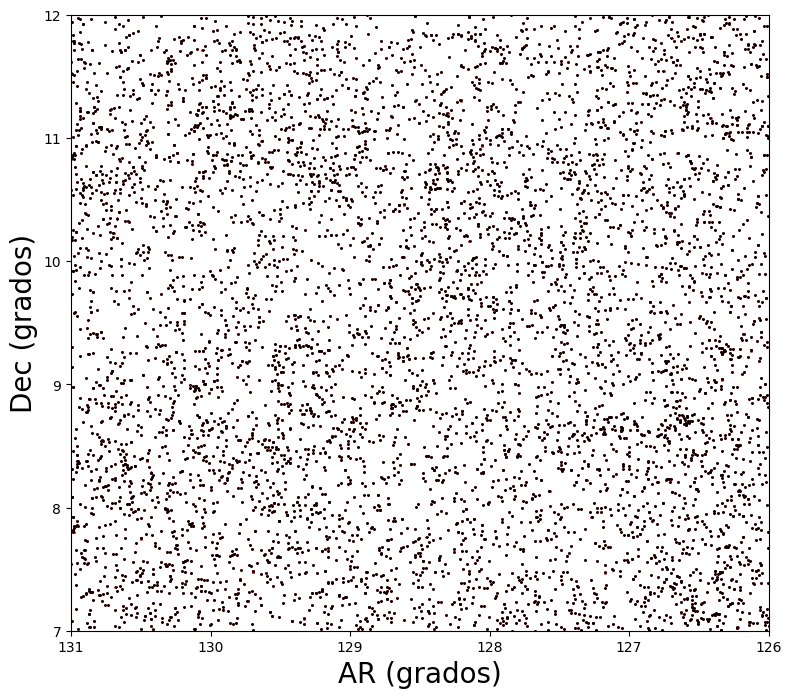

In [8]:
# convertir coordenadas AR de [0,360] a [-180,180] 
chgsign = np.where(result['ra'] > 180)
result['ra'][chgsign] = result['ra'][chgsign]-360.
result['plug_ra'][chgsign] = result['plug_ra'][chgsign]-360.

plt.figure(figsize=(9,8))

# graficar AR, Dec del catálogo LS en rojo con símbolos más grandes
plt.scatter(result['ra'],result['dec'],s=3,color='red',marker='1')

# sobreponer AR, Dec del catálogo SDSS en negro con símbolos más pequeños
plt.scatter(result['plug_ra'],result['plug_dec'],s=3,color='black',marker='2')

# Extensión de AR, Dec (en grados) a graficar
xmin = 126.
xmax = 131.
ymin = 7.
ymax = 12.

plt.axis([xmin, xmax, ymin, ymax])
plt.xlim(reversed(plt.xlim())) # invertir el eje x
plt.xlabel("AR (grados)", fontsize=20)
plt.ylabel("Dec (grados)", fontsize=20)
plt.show()

## Inspección visual de estructuras a gran escala

Graficar las posiciones de un rango amplio de corrimientos al rojo y sobreponer una sección delgada en corrimiento al rojo para mostrar posibles estructuras dentro de esa sección.

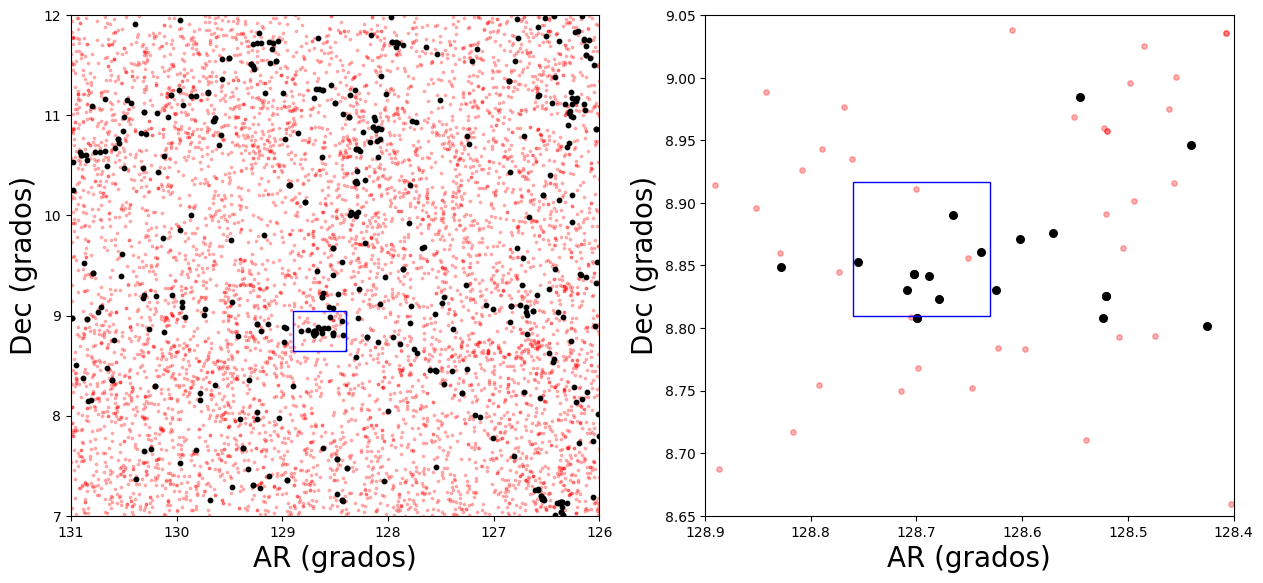

In [9]:
# Seleccionar sección de corrimiento al rojo
rz = (result['z'] >0.105) & (result['z']<0.125)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6.5))

# Graficar todos los puntos en rojo (todos los corrimientos al rojo)
ax1.scatter(result['plug_ra'],result['plug_dec'],s=3,color='r',marker='o',alpha=0.25)

# Sobreponer en negro los objetos en la sección estrecha de corrimiento al rojo
ax1.scatter(result['plug_ra'][rz],result['plug_dec'][rz],s=10,color='black')

# Extensión de AR, Dec (en grados) a graficar
xmin = 126.
xmax = 131.
ymin = 7.
ymax = 12.

ax1.axis([xmin, xmax, ymin, ymax])
ax1.set_xlim(reversed(ax1.set_xlim())) # invertir el eje x
ax1.set_xlabel("AR (grados)", fontsize=20)
ax1.set_ylabel("Dec (grados)", fontsize=20)

# Añadir rectángulo para mostrar dónde haremos zoom en el siguiente panel
ax1.add_patch(patches.Rectangle((128.65-0.25, 8.85-0.2),0.5,0.4,fill=False,color='b'))


## AMPLIAR A UNA REGIÓN MÁS PEQUEÑA

# Graficar todos los puntos en rojo (todos los corrimientos al rojo)
ax2.scatter(result['plug_ra'],result['plug_dec'],s=15,color='r',marker='o',alpha=0.3)

# Sobreponer en negro los objetos en la sección estrecha de corrimiento al rojo
ax2.scatter(result['plug_ra'][rz],result['plug_dec'][rz],s=30,color='black')

# Extensión de AR, Dec (en grados) a graficar
xmin = 128.4
xmax = 128.9
ymin = 8.65
ymax = 9.05

ax2.axis([xmin, xmax, ymin, ymax])
ax2.set_xlim(reversed(ax2.set_xlim())) # invertir el eje x
ax2.set_xlabel("AR (grados)", fontsize=20)
ax2.set_ylabel("Dec (grados)", fontsize=20)

# Añadir rectángulo para mostrar dónde haremos ampliación en el siguiente panel
ax2.add_patch(patches.Rectangle((128.63, 8.81),0.13,0.107,fill=False,color='b'))

plt.show()

Arriba, el panel de la izquierda muestra una sección estrecha de corrimiento al rojo (0.105 < *z* < 0.125, símbolos negros) entre objetos con corrimientos al rojo del muestreo espectroscópico de SDSS DR17 (símbolos rojos). A simple vista se pueden apreciar algunas estructuras filamentosas a gran escala y sobredensidades. El rectángulo azul muestra una región seleccionada donde hacemos zoom en el panel de la derecha. En este último, seleccionamos además una región aún más pequeña, que usaremos en la siguiente celda.

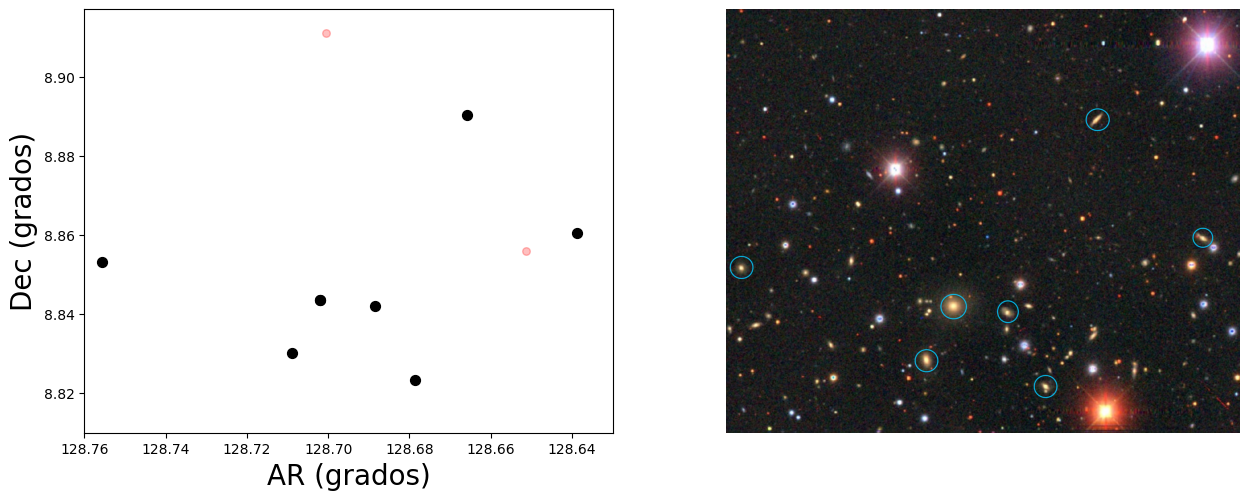

In [10]:
## AMPLIACIÓN NUEVAMENTE DE UNA REGIÓN AÚN MÁS PEQUEÑA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5.5))

# Graficar todos los puntos en rojo (todos los corrimientos al rojo)
ax1.scatter(result['plug_ra'],result['plug_dec'],s=30,color='r',marker='o',alpha=0.25)

# Sobreponer en negro los objetos en la sección estrecha de corrimiento al rojo
ax1.scatter(result['plug_ra'][rz],result['plug_dec'][rz],s=50,color='black')

# Extensión de AR, Dec (en grados) a graficar
xmin = 128.63
xmax = 128.76
ymin = 8.81
ymax = 8.917

ax1.axis([xmin, xmax, ymin, ymax])
ax1.set_xlim(reversed(ax1.set_xlim())) # invertir el eje x
ax1.set_xlabel("AR (grados)", fontsize=20)
ax1.set_ylabel("Dec (grados)", fontsize=20)

## MOSTRAR IMAGEN DE DECaLS (captura de pantalla ya preparada, pero podría implementarse recorte de imagen)
im = plt.imread('DECaLS_screenshot_zoomIn_labels.jpg')
ax2.imshow(im)
ax2.axis('off')

plt.show()

El panel izquierdo muestra la pequeña región delimitada por el rectángulo azul que elegimos antes (panel derecho). Las galaxias en negro están en la misma sección estrecha de corrimiento al rojo definida previamente (0.105 < *z* < 0.125). El panel derecho es un recorte de imagen de la misma región del cielo desde el [visor del cielo LS](https://legacysurvey.org/viewer?ra=128.7040&dec=8.8439&zoom=13&layer=ls-dr10). Las galaxias encerradas corresponden a los puntos en negro, y algunas o quizás la mayoría probablemente pertenecen a un cúmulo de galaxias.

## Estructuras a Gran Escala con Morfologías de LS

Hay muchas extensiones posibles para este trabajo. Por ejemplo, se podría graficar nuevamente usando símbolos codificados con el *type* del objeto (de LS) y/o *class* (de SDSS) y/o la dispersión de velocidades (de SDSS) y/o otras cantidades.  
Aquí, comenzaremos con el campo "TYPE" del objeto de LS, relacionado con las formas morfológicas.

La forma del objeto (perfil de luz 2D) es modelada por [The Tractor](http://thetractor.org) ([Lang, Hogg & Mykytyn](http://adsabs.harvard.edu/abs/2016ascl.soft04008L)) como parte del procedimiento para calcular la fotometría modelada.

Formas posibles para la [Clasificación Morfológica de LS DR10](https://www.legacysurvey.org/dr10/description/#morphological-classification):  
<ul>
<li>PSF (función de dispersión puntual: el tamaño variará con el seeing de las observaciones)</li>
<li>REX (“round exponential” — galaxias redondas exponenciales con un radio efectivo variable)</li>
<li>EXP (perfil exponencial; galaxias espirales)</li>
<li>DEV (perfil de de Vaucouleurs; galaxias elípticas)</li>
<li>SER (perfil de Sérsic)</li>
<li>DUP (marcado para fuentes de Gaia duplicadas por una fuente extendida — solo para información, sin flujo)</li>
</ul>

<figure>
<img src="Gals_Qso.jpg", align="left", width=600>
<figcaption>Figura: Imágenes de galaxias que incluyen una galaxia elíptica cercana, una galaxia espiral cercana y un QSO.</figcaption>
</figure>

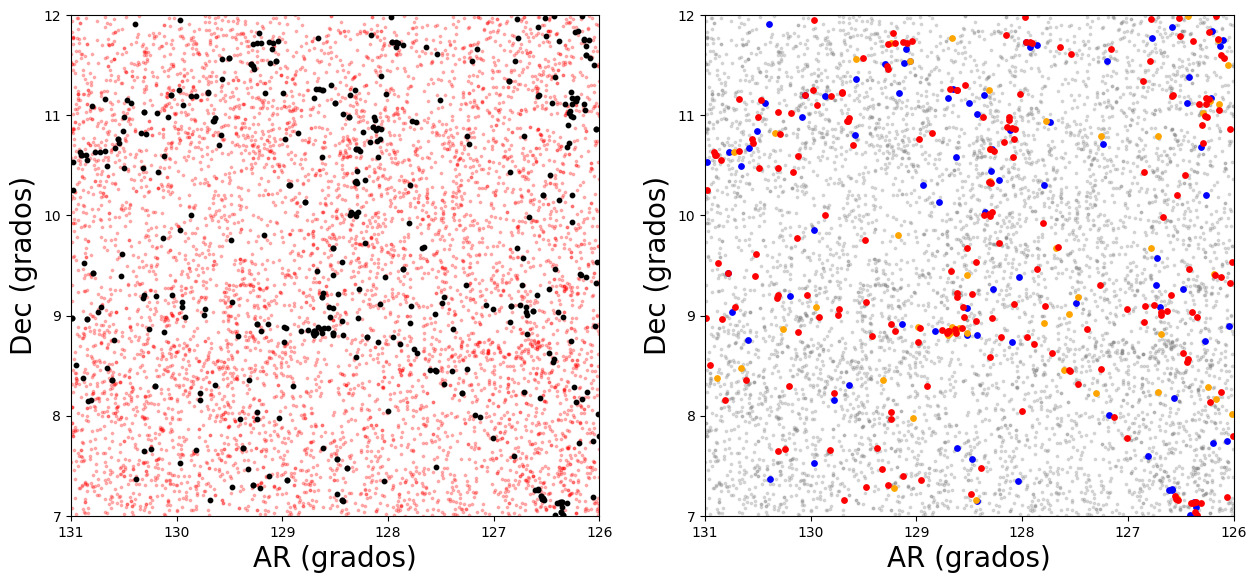

In [11]:
# Seleccionar sección de corrimiento al rojo
rz = (result['z'] >0.105) & (result['z']<0.125)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6.5))

# graficar todos los puntos en rojo (todos los corrimientos al rojo)
ax1.scatter(result['plug_ra'],result['plug_dec'],s=3,color='r',marker='o',alpha=0.25)

# sobreponer en negro los objetos en la sección estrecha de corrimiento al rojo
ax1.scatter(result['plug_ra'][rz],result['plug_dec'][rz],s=10,color='black')

# Extensión de AR, Dec (en grados) a graficar
xmin = 126.
xmax = 131.
ymin = 7.
ymax = 12.

ax1.axis([xmin, xmax, ymin, ymax])
ax1.set_xlim(reversed(ax1.set_xlim())) # invertir el eje X
ax1.set_xlabel("AR (grados)", fontsize=20)
ax1.set_ylabel("Dec (grados)", fontsize=20)

# Seleccionar sección de corrimiento al rojo y por tipo morfológico

# DEV o Sérsic temprano con índice Sérsic pronunciado >=3
rdev = np.where(((result['type']=='DEV')|((result['type']=='SER')&(result['sersic']>=3))) & rz)
# EXP o Sérsic tardío con índice Sérsic <2
rexp = np.where(((result['type']=='EXP')|((result['type']=='SER')&(result['sersic']<2))) & rz)
# Intermedio con 2<= Sérsic < 3
rint = np.where(((result['type']=='SER')&(result['sersic']>=2)&(result['sersic']<3)) & rz)

# Graficar todos los puntos en rojo (todos los corrimientos al rojo)
ax2.scatter(result['plug_ra'],result['plug_dec'],s=3,color='gray',marker='o',alpha=0.25)

# Sobreponer los objetos en la sección estrecha de corrimiento al rojo codificados por color:
# azul (EXP o Sérsic tardío) o rojo (DEV o Sérsic temprano)
ax2.scatter(result['plug_ra'][rexp],result['plug_dec'][rexp],s=15,color='b')         # azul = EXP o Sérsic tardío
ax2.scatter(result['plug_ra'][rint],result['plug_dec'][rint],s=15,color='orange')    # naranja = Intermedio
ax2.scatter(result['plug_ra'][rdev],result['plug_dec'][rdev],s=15,color='r')         # rojo = DEV o Sérsic temprano

plt.axis([xmin, xmax, ymin, ymax])
plt.xlim(reversed(plt.xlim())) # invertir el eje X
plt.xlabel("AR (grados)", fontsize=20)
plt.ylabel("Dec (grados)", fontsize=20)
plt.show()

<a class="anchor" id="exercise"></a>
## EJERCICIO: Estructuras a Gran Escala con Colores de Galaxias

Hay colores precomputados disponibles. Las columnas están descritas aquí:
https://datalab.noirlab.edu/query.php?name=ls_dr10.tractor

Otra posibilidad sería graficar nuevamente las coordenadas espaciales de las galaxias, pero codificadas por color de acuerdo a sus colores fotométricos. Esto se deja como ejercicio para el usuario, pero no dude en ponerse en contacto con el equipo de Astro Data Lab si tiene preguntas.

<a class="anchor" id="3d_plot"></a>
# Estructura a Gran Escala en 3D

Podemos explorar filamentos y cúmulos de galaxias mejor si podemos graficarlos en 3D. Nos dirigimos a una zona diferente del cielo y realizaremos una consulta para obtener una muestra de galaxias SDSS en el universo cercano y moderadamente distante, para graficar en 3D el cono que las contiene. Para evitar contaminación por el plano galáctico de la Vía Láctea, apuntamos nuestro cono de búsqueda a altas latitudes galácticas.

### Consulta de datos y preparación
Seleccionamos (principalmente) galaxias SDSS dentro de un radio de 10 grados alrededor de una dirección de alta latitud galáctica, (AR, Dec) = (160,45) grados. Limitamos nuestra búsqueda a corrimientos al rojo positivos entre 0.02 y 0.3.

In [12]:
# Crear la consulta para obtener los datos de SDSS desde Data Lab:

query = """
SELECT ra,dec,z
FROM sdss_dr17.specobj
WHERE q3c_radial_query(ra,dec,%s,%s,%s)
AND z between 0.02 AND 0.3
""" % (160,45,10)

print (query)


SELECT ra,dec,z
FROM sdss_dr17.specobj
WHERE q3c_radial_query(ra,dec,160,45,10)
AND z between 0.02 AND 0.3



Ejecutar la consulta para obtener los datos de SDSS de la tabla `ls_dr17.specobj`

In [13]:
selection = qc.query(adql=query, fmt='csv')

Reformatear la salida en una tabla

In [14]:
data = Table.read(selection, format='csv')  # Astropy Table
print("Número de galaxias en la muestra: %d" % len(data))
data[:5]

Número de galaxias en la muestra: 36331


<Table length=5>
        ra            dec         z     
     float64        float64    float64  
------------------ --------- -----------
         159.25732 54.941463 0.072250396
159.17507999999998 54.942007  0.14156331
         162.24439 54.889704  0.14798966
         162.50349 54.858997  0.17074445
         162.42234 54.829701  0.18014126

Calcular la distancia de luminosidad para cada galaxia, usando los valores de la [cosmología Planck2018](https://ui.adsabs.harvard.edu/abs/2020A%26A...641A...6P/abstract)

In [15]:
dist = cosmo.luminosity_distance(data['z'])
dist

<Quantity [ 337.39762839,  691.83881435,  726.14050491, ...,  786.81545274,
           1396.61743206, 1409.31106543] Mpc>

Para graficar las posiciones de cada galaxia en un espacio 3D real, convertiremos las coordenadas angulares AR y Dec, y la coordenada de distancia, a coordenadas cartesianas X, Y, Z (todas medidas en Mpc desde el origen del sistema de coordenadas).

In [16]:
def convertir_a_cartesianas(ra,dec,dist):
    # Convertir AR y Dec a radianes, ya que numpy espera esto como argumentos para las funciones trigonométricas
    rarad = np.radians(ra)
    decrad = np.radians(dec)
    X = dist * np.sin(decrad) * np.cos(rarad)
    Y = dist * np.sin(decrad) * np.sin(rarad)
    Z = dist * np.cos(decrad)
    return X,Y,Z

In [17]:
X,Y,Z = convertir_a_cartesianas(data['ra'],data['dec'],dist)

### Graficado en 3D
Para crear un gráfico 3D interactivo (uno donde podamos ampliar, desplazar y rotar la escena), usaremos el paquete plotly. Las galaxias de nuestra muestra serán graficadas usando una rutina de dispersión 3D. También configuramos algunas propiedades generales del gráfico, como el tamaño de los marcadores y un mapa de colores (coloreamos cada galaxia más roja cuanto más lejos esté).

In [18]:
trace = go.Scatter3d(
    x = X,
    y = Y,
    z = Z,
    mode = 'markers',
    marker = {
        'size'      : 0.7,
        'opacity'   : 0.5,
        'color'     : dist, 
        'colorscale': 'OrRd'
    }
)

data = [trace]

A continuación, definimos la ubicación de la cámara y la disposición del gráfico

In [19]:
# Configurar el punto de vista
camera = dict(
    up = dict(x = 0, y = 0, z = 1),
    center = dict(x = 0.2, y = 0, z = 0),
    eye = dict(x = 0.6, y = -0.6, z = -1.0)
)

# Configurar la escena del gráfico
layout = go.Layout(
    scene = dict(
        xaxis = dict(title = 'X',
                     backgroundcolor = 'black',
                     gridcolor = "rgb(40,40,40)"),
        yaxis = dict(title = 'Y',
                     backgroundcolor = 'black',
                     gridcolor = "rgb(40,40,40)"),
        zaxis = dict(title = 'Z',
                     backgroundcolor = 'black',
                     gridcolor = "rgb(40,40,40)"),
    ),
        scene_camera = camera,
        plot_bgcolor = 'black',
        paper_bgcolor = 'black',
        title = None,
        showlegend = False,
        width = 800,
        height = 800,
        autosize = False,
        margin = {'l':0, 'r':0, 'b':0, 't':0},
        dragmode = 'orbit'
)

In [ ]:
# Dibujar el gráfico
plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout()

Explore la escena:
- **Ampliando y reduciendo** (rueda del ratón hacia arriba/abajo, o click con el botón central y mover el ratón hacia arriba/abajo, o seleccionar el modo "zoom" en el botón de la esquina superior derecha y hacer click + arrastrar con el ratón)
- **Desplazando a izquierda/derecha y arriba/abajo** (click con el botón izquierdo y arrastrar)
- **Cambiando entre modo desplazamiento/rotación** seleccionando uno de los botones en la esquina superior derecha del gráfico (desplazamiento, rotación orbital, rotación en mesa giratoria) 